In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [2]:
ruta ="tabla_final.csv"
df = pd.read_csv(ruta)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,5.0,2.0,2016-03-03 02:02:57,8.0,315.0,17,KE,1.0,38.0


In [3]:
var = [x for x in df.columns if len(x) <= 5]
var = [x for x in var if x != 'EXT7']

In [4]:
df.dropna(inplace = True)
df.reset_index(drop=True,inplace = True)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,5.0,2.0,2016-03-03 02:02:57,8.0,315.0,17,KE,1.0,38.0


In [5]:
X = df[var]
y = df['EXT7']

In [6]:
X = X.astype(str)

In [7]:
# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (463932, 49) (463932,)
Test (228504, 49) (228504,)


In [8]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

In [9]:
y_train_enc = np.where(y_train>3,1,0)
y_test_enc = np.where(y_test>3,1,0)

### Chi-Squared 

In [10]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Característica 0: 96401.759122
Característica 1: 64455.580569
Característica 2: 63516.223965
Característica 3: 56626.358379
Característica 4: 83912.893275
Característica 5: 40537.504792
Característica 6: 30967.767424
Característica 7: 54406.724017
Característica 8: 63980.466852
Característica 9: 5997.944650
Característica 10: 5403.965272
Característica 11: 4906.669350
Característica 12: 5827.838114
Característica 13: 4066.093083
Característica 14: 5707.064900
Característica 15: 3522.093460
Característica 16: 4092.580837
Característica 17: 6423.144928
Característica 18: 15174.618695
Característica 19: 3009.347968
Característica 20: 18797.314080
Característica 21: 1273.944956
Característica 22: 5286.559908
Característica 23: 9650.134055
Característica 24: 3949.357561
Característica 25: 27867.048838
Característica 26: 8834.614257
Característica 27: 7557.293041
Característica 28: 17949.097581
Característica 29: 1494.885180
Característica 30: 1772.083912
Característica 31: 2571.190017
Carac

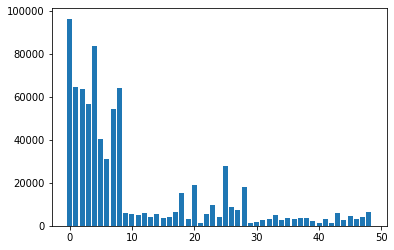

In [11]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()